# Setup

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
%load_ext autoreload
%aimport networks
from networks import RAGraph, BAGraph
%aimport log_bin
# helper functions
%aimport utils
font_size = 20
%autoreload 1

# Fixed N and varying m

In [8]:
# save to file
# fixed_n_df.to_csv('data/ra/degree_distribution1/fixed_n_degrees.csv')

# load from file
fixed_n_df = pd.read_csv('data/ra/degree_distribution1/fixed_n_degrees.csv', index_col=0)
fixed_n_df.columns = fixed_n_df.columns.astype(int)

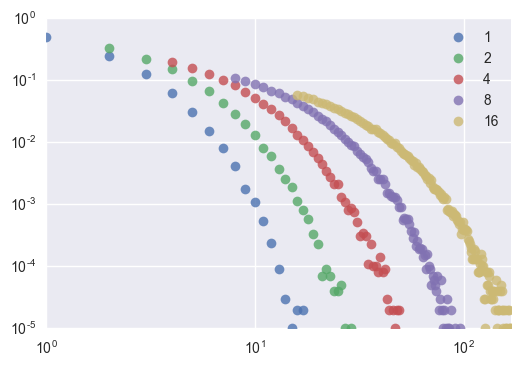

In [35]:
# fixed_n_df.plot(style='o', loglog=True)
fixed_n_degrees = utils.value_counts_and_plot(fixed_n_df)

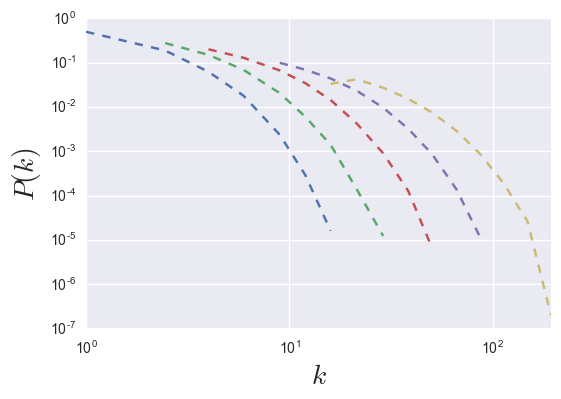

In [10]:
fixed_n_logbin = utils.log_bin_and_plot(fixed_n_df, a=1.3, font_size=font_size)

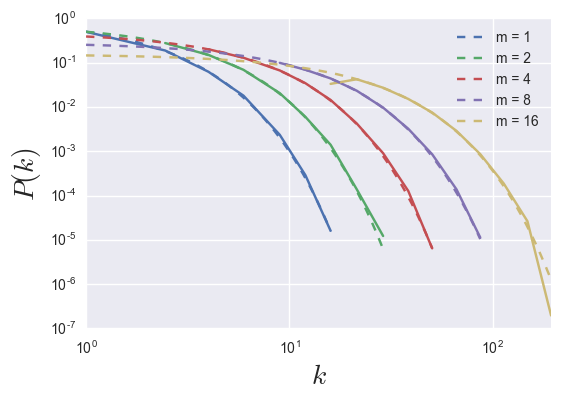

In [11]:
# plot numerical results
utils.log_bin_and_plot(fixed_n_df, a=1.3, font_size=font_size, style='-', loglog=True, label='__nolegend__')

model_df = utils.get_model_df(fixed_n_logbin, fixed_n_logbin.columns, model=utils.deg_dist_ra_theory, index=False)
# plot model
current_palette = sns.color_palette()
for i, col in enumerate(model_df):
    model_df[col].dropna().plot(loglog=True, style='--', color=current_palette[i], label='m = '+str(col))
plt.legend()

# Fixed m and varying N

In [26]:
# load the data
powers_of_n = np.arange(2, 6)
N = 10**powers_of_n
m = 4
fixed_m_df = pd.DataFrame()

for n in N:
    print(n)
    degrees = RAGraph.load_degrees(n, m, folder="degree_distribution1")
    additional = pd.DataFrame(degrees, index=[n]).T
    fixed_m_df = pd.concat([fixed_m_df, additional], axis=1)

100
1000
10000
100000


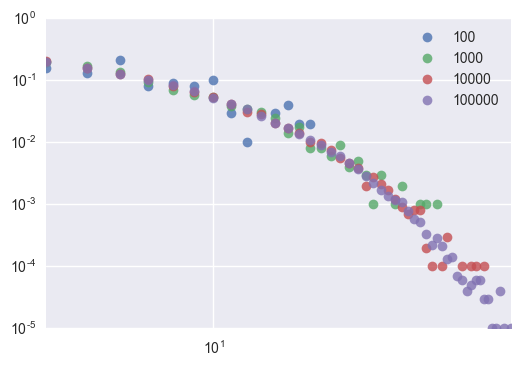

In [34]:
fixed_m_degrees = utils.value_counts_and_plot(fixed_m_df)

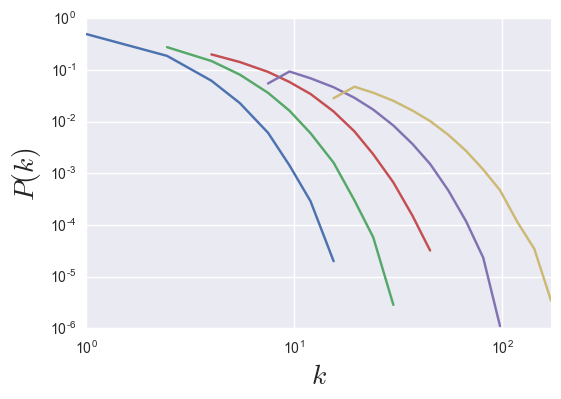

In [31]:
# plot numerical results
fixed_m_logbin = utils.log_bin_and_plot(fixed_n_df, a=1.2, font_size=font_size, style='-', loglog=True, label='__nolegend__')

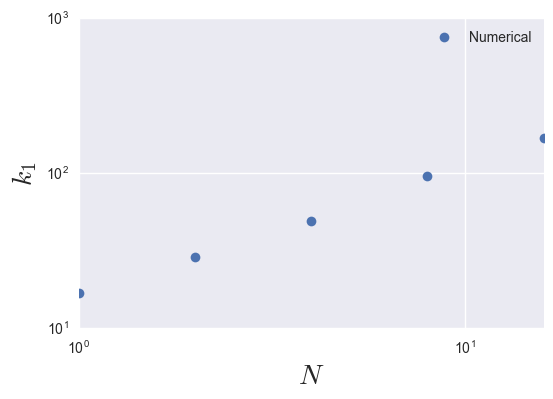

In [38]:
largest_expected_degree = []
largest_degree_theory = []
for col in fixed_n_degrees:
    a = fixed_n_degrees[col].dropna()[fixed_n_degrees[col] != 0].tail(1).index.values[0]
#     k1 = utils.largest_degree_ra(col, m)
    largest_expected_degree.append(a)

numerical = pd.Series(largest_expected_degree, index=fixed_n_degrees.columns)
numerical.plot(style='o', loglog=True, label='Numerical')

ax = plt.gca()
plt.legend()
ax.set_ylabel(u"$k_1$", fontsize=font_size)
ax.set_xlabel(u"$N$", fontsize=font_size)